## Sprint 機械学習スクラッチ ロジスティック回帰

In [1]:
import numpy as np

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を **シグモイド関数** に通したものです。シグモイド関数は以下の式で表されます。
$$
g(z) = \frac{1}{1+e^{−z}}.
$$
線形回帰の仮定関数は次の式でした。
$$
h_\theta(x) = \theta^T \cdot x.
$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$
h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.
$$
$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

In [2]:
np.random.seed(0)
# 訓練データを用意、100行4列
X_train = np.random.rand(400).reshape(-1, 4)
# thetaは未知のパラメーター
theta = np.random.randn(4)
# 目的変数 0,1の二値数
y_train = np.random.binomial(1, 0.5, 100)

# 同様な検証データも用意、50行4列
X_test = np.random.rand(200).reshape(-1, 4)
y_test = np.random.binomial(1, 0.5, 50)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, theta.shape

((100, 4), (100,), (50, 4), (50,), (4,))

In [3]:
def _logistic_hypothesis(X, theta):
    """
    ロジスティック回帰の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    theta : 次の形のndarray, shape (n_samples, 1)
      係数
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      ロジスティック回帰の仮定関数による推定結果
      線形回帰の仮定関数をシグモイド関数に通したもの
    """
    linear_hypo = np.dot(X, theta)
    hypo = 1.0 / (1.0 + np.exp(-linear_hypo))
    return hypo

In [4]:
_logistic_hypothesis(X_train, theta).shape, _logistic_hypothesis(X_test, theta).shape

((100,), (50,))

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\
$$
$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\
$$
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$
$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$λ$ : 正則化パラメータ

In [5]:
def _gradient_descent(X, y, theta):
    """
    theta : 係数
    alpha_ : 学習率
    lambda_ : 正則化パラメータ
    m : サンプル数
    n　: 特徴量数
    """
    alpha_ = 0.1
    lambda_ = 0.2
    m, n = X.shape
    theta1 = np.dot(_logistic_hypothesis(X, theta) - y, X)
    theta2 = lambda_ * theta
    # biasを入れない場合はtheta2[-1] = 0　の処理を追加
    theta -= (alpha_ / m) * (theta1 + theta2)
    print(theta.shape)

In [6]:
_gradient_descent(X_train, y_train, theta)

(4,)


## 【問題3】推定

推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

- 下のScratchLogisticRegressionクラスに追加

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の **目的関数（損失関数）** を実装してください。そして、これを`self.loss`, `self.val_loss`に記録するようにしてください。

なお、この数式には正則化項が含まれています。
$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$
$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$n$ : 特徴量の数

$λ$ : 正則化パラメータ

- 下のScratchLogisticRegressionクラスに追加

### 実装したスクラッチ

In [7]:
class ScratchLogisticRegression():
    import numpy as np
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    C : int or float ( >0)
    lambda_ : Cの逆数
      正則化のパラメーター
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self._theta : 次の形のndarray, shape (n_features,)
      パラメータ（self.coef_　と　self.intercept_からなる）
    self.coef_ : 次の形のndarray, shape (n_features,)
    self.intercept_ : int or float
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, C=1, no_bias=False, verbose=False, random_state=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.C = C
        self.lambda_ = 1 / self.C
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 乱数のコントロール(int)
        self.random_state = random_state
        
    def _logistic_hypothesis(self, X, theta):
        """
        ロジスティック回帰の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        theta : 次の形のndarray, shape (n_samples, 1)
          係数
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          ロジスティック回帰の仮定関数による推定結果
          線形回帰の仮定関数をシグモイド関数に通したもの
        """
        linear_hypo = np.dot(X, theta)
        hypo = 1.0 / (1.0 + np.exp(-linear_hypo))
        return hypo

    def _gradient_descent(self, X, y):
        """
        self.m : サンプル数
        self._theta　: パラメーター（係数, 切片）
        """
        theta1 = np.dot(_logistic_hypothesis(X, self._theta) - y, X)
        theta2 = self.lambda_ * self._theta    
        if self.no_bias == False:
            theta2[-1] = 0
        self._theta -= (self.lr / self.m) * (theta1 + theta2)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # 変数情報を管理
        self.X = X
        self.m, self.n = self.X.shape

        # 切片を計算する場合はXの配列の最後の列に１を追加, nの数を１追加
        if self.no_bias is False:
            self.n += 1
            self.X = np.concatenate([self.X, np.ones(self.m).reshape(self.m, -1)], axis=1)

        # fitが呼び出されるとtheta（係数と切片）を初期化
        # random_stateが設定されている場合はseed設定
        if type(self.random_state) == int:
            np.random.seed(self.random_state)
        self._theta = np.random.randn(self.n)

        # 検証データが訓練データと同様の特徴量数（n)を持つ場合は同様の学習、予測処理を行わせたいため、flagを立てる
        val_flag = True if type(X_val) is np.ndarray and X_val.shape[1]==X.shape[1] else False
        # iterの回数探索を繰り返す
        for i in range(self.iter):
            
            # 　self._thetaの更新
            self._gradient_descent(self.X, y)     
            
            # 訓練データの予測確率、損失関数の計算し記録
            y_pred_proba = self.predict_proba(X)
            self.loss[i] = self._loss_func(y_pred_proba, y)
            
            # val_dataがある時は同様の処理
            if val_flag:
                y_val_pred_proba = self.predict_proba(X_val)
                self.val_loss[i] = self._loss_func(y_val_pred_proba, y_val)
            
            #verboseをTrueにした際は学習過程を出力
            if self.verbose is True:
                print('iter:{}'.format(i+1))
                if self.no_bias is False:
                    print('coef_:{}'.format(self._theta[:self.n-1]))
                    print('intercept_:{}'.format(self._theta[-1]))
                    print('train_loss:{}'.format(self.loss[i]))
                else:
                    print('coef_:{}'.format(self._theta))
                    print('train_loss:{}'.format(self.loss[i]))
                if val_flag:
                    print('val_loss:{}'.format(self.val_loss[i]))
            
        # iter回の探索後、係数と切片の変数に分ける
        if self.no_bias is False:
            self.coef_, self.intercept_ = self._theta[:self.n-1], self._theta[-1]
        else:
            self.coef_ = self._theta
            self.intercept_ = None

    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        threshhold : 閾値 float

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # fit　が呼び出されていない場合は　エラー
        if self._theta is False:
            print("It hasn't been fitted yet")
        else:
            m, n = X.shape
            #　切片を計算している場合はX の最後の列に１を追加
            if self.no_bias is False:
                X = np.concatenate([X, np.ones(m).reshape(m, -1)], axis=1)
            y_pred_proba = self._logistic_hypothesis(X, self._theta)
            y_pred = np.where(y_pred_proba > threshold, 1, 0)
        return y_pred
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # fit　が呼び出されていない場合は　エラー
        if self._theta is False:
            print("It hasn't been fitted yet")
        else:
            m, n = X.shape
            #　切片を計算している場合はX の最後の列に１を追加
            if self.no_bias is False:
                X = np.concatenate([X, np.ones(m).reshape(m, -1)], axis=1)
            y_pred_proba = self._logistic_hypothesis(X, self._theta)
            return y_pred_proba

    def _loss_func(self, y_pred_proba, y):
        """
        目的関数の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
        y : 次の形のndarray, shape (n_samples,)
        正解値
        Returns
        ----------
        """
        # m（行数）をyから取得
        m = y_pred_proba.shape[0]
        # n（列数）はbias有では+1されているので場合わけ
        n = self.n-1 if self.no_bias is False else self.n
        a = (y * np.log(y_pred_proba))
        b = ((1 - y) * np.log(1 - y_pred_proba))
        c = np.power(self._theta[:n], 2).sum() * self.lambda_ / 2
        # print('y:{}'.format(y))
        # print('y_pred_proba:{}'.format(y_pred_proba))
        # print(a, b, c)
        loss_value = -((y * np.log(y_pred_proba)).sum()+ ((1 - y) * np.log(1 - y_pred_proba)).sum() - np.power(self._theta[:n], 2).sum() * self.lambda_ / 2) / m
        return loss_value

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
iris_data.keys(), iris_data.target_names, iris_data.feature_names

(dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [9]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_X = pd.DataFrame(iris_data.data, columns=feature_names)
df_y = pd.DataFrame(iris_data.target, columns=['Species'])
df = pd.concat([df_X, df_y], axis=1)
df['Species_name'] = iris_data.target_names[df['Species']]
df

,sepal_length,sepal_width,petal_length,petal_width,Species,Species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
# Speicies virgicolorとvirginica(1と2)を選択
# 特徴量　sepal_lengthとpetal_lengthを選択
X_choice = ['sepal_length', 'petal_length', 'Species', 'Species_name']
y_choice = 'Species == 1 | Species == 2'
df_choice = df.query(y_choice)[X_choice]
df_choice

,sepal_length,petal_length,Species,Species_name
50,7.0,4.7,1,versicolor
51,6.4,4.5,1,versicolor
52,6.9,4.9,1,versicolor
53,5.5,4.0,1,versicolor
54,6.5,4.6,1,versicolor
...,...,...,...,...
145,6.7,5.2,2,virginica
146,6.3,5.0,2,virginica
147,6.5,5.2,2,virginica
148,6.2,5.4,2,virginica


In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df_choice.iloc[:, 0:2].values
#　目的変数を0, 1に分類するように処理
y = df_choice.iloc[:, 2].values - 1
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.25, random_state=0)
X_train2[:5], y_train2[:5]

(array([[5.1, 3. ],
        [6.3, 4.7],
        [5.9, 5.1],
        [6.4, 5.6],
        [6.2, 4.8]]),
 array([0, 0, 1, 1, 1]))

In [12]:
# 前処理、標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2_scl = scaler.transform(X_train2)
X_test2_scl = scaler.transform(X_test2)
X_train2_scl[:5], X_test2_scl[:5]

(array([[-1.77029021, -2.29778941],
        [ 0.03817879, -0.24187257],
        [-0.56464421,  0.24187257],
        [ 0.18888454,  0.84655399],
        [-0.11252696, -0.12093628]]),
 array([[ 7.91707539e-01, -1.20936285e-01],
        [ 3.81787899e-02,  8.46553995e-01],
        [ 9.42413289e-01,  2.14825997e-15],
        [ 1.99735354e+00,  2.05591684e+00],
        [ 1.39453054e+00,  1.33029913e+00]]))

In [13]:
# 指標値の計算式
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def score_calc(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print('F値 = {}'.format(f1))

In [14]:
# Scratchの学習と推定
slr = ScratchLogisticRegression(num_iter=1000, lr=0.3, C=1, verbose=True, random_state=0)
slr.fit(X_train2_scl, y_train2, X_test2_scl, y_test2)
y_slr_pred = slr.predict(X_test2_scl)
y_slr_pred_proba = slr.predict_proba(X_test2_scl)

iter:1
coef_:[1.75100884 0.44483886]
intercept_:0.9428120674622944
train_loss:0.546925482377433
val_loss:0.6880626857874281
iter:2
coef_:[1.73707695 0.48794614]
intercept_:0.9088466148239761
train_loss:0.5364291039783609
val_loss:0.6772576707748942
iter:3
coef_:[1.72236614 0.52959771]
intercept_:0.8767066633455629
train_loss:0.5266501700199029
val_loss:0.6670383185006267
iter:4
coef_:[1.70697318 0.56989936]
intercept_:0.8462693420697001
train_loss:0.5175081630718112
val_loss:0.6573489933390646
iter:5
coef_:[1.69098384 0.60894568]
intercept_:0.8174225789316051
train_loss:0.5089342159547209
val_loss:0.6481421445791323
iter:6
coef_:[1.67447434 0.64682147]
intercept_:0.7900639456203893
train_loss:0.50086917027071
val_loss:0.6393768596056245
iter:7
coef_:[1.65751256 0.68360294]
intercept_:0.7640996319051085
train_loss:0.49326199064061343
val_loss:0.6310177098790003
iter:8
coef_:[1.64015911 0.71935878]
intercept_:0.7394435383687651
train_loss:0.4860684653955182
val_loss:0.6230338250704608
it

train_loss:0.26677625331599575
val_loss:0.46917425074415886
iter:281
coef_:[-0.28227294  3.15351921]
intercept_:0.22533040600477985
train_loss:0.26676325632698855
val_loss:0.4693301988929052
iter:282
coef_:[-0.28328036  3.15520058]
intercept_:0.2253735966359462
train_loss:0.2667505045274698
val_loss:0.4694849623379328
iter:283
coef_:[-0.28427747  3.15686647]
intercept_:0.22541661209270789
train_loss:0.2667379931930804
val_loss:0.46963854735382
iter:284
coef_:[-0.28526441  3.15851701]
intercept_:0.225459450512856
train_loss:0.2667257176932791
val_loss:0.4697909602487826
iter:285
coef_:[-0.28624128  3.16015235]
intercept_:0.2255021101057661
train_loss:0.26671367348939923
val_loss:0.469942207362436
iter:286
coef_:[-0.28720819  3.16177264]
intercept_:0.22554458915084213
train_loss:0.2667018561327505
val_loss:0.4700922950636214
iter:287
coef_:[-0.28816526  3.16337801]
intercept_:0.22558688599599266
train_loss:0.2666902612627599
val_loss:0.470241229748294
iter:288
coef_:[-0.28911259  3.16496

intercept_:0.23032026252385215
train_loss:0.26609465678393546
val_loss:0.4845343098718952
iter:481
coef_:[-0.37046897  3.30793853]
intercept_:0.23033108558290255
train_loss:0.2660943413373075
val_loss:0.4845627912542244
iter:482
coef_:[-0.37061453  3.30820693]
intercept_:0.23034181850610266
train_loss:0.2660940316255217
val_loss:0.48459101974441793
iter:483
coef_:[-0.37075873  3.30847289]
intercept_:0.2303524619753308
train_loss:0.2660937275439657
val_loss:0.48461899753810384
iter:484
coef_:[-0.37090159  3.30873643]
intercept_:0.23036301666854342
train_loss:0.26609342898994537
val_loss:0.4846467268127795
iter:485
coef_:[-0.37104313  3.30899758]
intercept_:0.23037348325977355
train_loss:0.26609313586264877
val_loss:0.48467420972794306
iter:486
coef_:[-0.37118336  3.30925636]
intercept_:0.23038386241912986
train_loss:0.2660928480631118
val_loss:0.48470144842522545
iter:487
coef_:[-0.37132228  3.30951278]
intercept_:0.23039415481279632
train_loss:0.26609256549418386
val_loss:0.48472844502

coef_:[-0.3848614   3.33473737]
intercept_:0.23144522753014643
train_loss:0.26607741459063095
val_loss:0.48741068893103656
iter:742
coef_:[-0.38487473  3.33476245]
intercept_:0.231446312781871
train_loss:0.26607741191089634
val_loss:0.48741338139159734
iter:743
coef_:[-0.38488793  3.3347873 ]
intercept_:0.23144738827627642
train_loss:0.26607740927957785
val_loss:0.48741604948118356
iter:744
coef_:[-0.38490102  3.33481192]
intercept_:0.23144845410036197
train_loss:0.26607740669580043
val_loss:0.4874186934199679
iter:745
coef_:[-0.38491399  3.33483632]
intercept_:0.2314495103403639
train_loss:0.2660774041587049
val_loss:0.4874213134261414
iter:746
coef_:[-0.38492684  3.33486049]
intercept_:0.23145055708176204
train_loss:0.2660774016674476
val_loss:0.48742390971593175
iter:747
coef_:[-0.38493958  3.33488445]
intercept_:0.23145159440928612
train_loss:0.26607739922120005
val_loss:0.48742648250362
iter:748
coef_:[-0.3849522   3.33490819]
intercept_:0.23145262240692208
train_loss:0.2660773968

coef_:[-0.3861632   3.33718866]
intercept_:0.23155174562539363
train_loss:0.26607726814588345
val_loss:0.48767415111683804
iter:981
coef_:[-0.38616471  3.3371915 ]
intercept_:0.23155186960471108
train_loss:0.26607726811150306
val_loss:0.4876744567957542
iter:982
coef_:[-0.3861662   3.33719432]
intercept_:0.23155199246083116
train_loss:0.2660772680777433
val_loss:0.48767475970303037
iter:983
coef_:[-0.38616768  3.33719711]
intercept_:0.2315521142039191
train_loss:0.26607726804459325
val_loss:0.4876750598637916
iter:984
coef_:[-0.38616915  3.33719987]
intercept_:0.23155223484404833
train_loss:0.26607726801204196
val_loss:0.48767535730293604
iter:985
coef_:[-0.3861706   3.33720261]
intercept_:0.23155235439120125
train_loss:0.26607726798007825
val_loss:0.48767565204513524
iter:986
coef_:[-0.38617204  3.33720533]
intercept_:0.23155247285527011
train_loss:0.2660772679486918
val_loss:0.487675944114838
iter:987
coef_:[-0.38617347  3.33720802]
intercept_:0.23155259024605782
train_loss:0.2660772

In [15]:
# sklearnの学習と推定
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train2_scl, y_train2)
y_pred = lr.predict(X_test2_scl)
y_pred_proba = lr.predict_proba(X_test2_scl)

In [16]:
# スクラッチの係数、切片
slr.coef_, slr.intercept_

(array([-0.38619089,  3.33724085]), 0.2315540229602887)

In [17]:
# スクラッチの指標値
score_calc(y_test2, y_slr_pred)

Accuracy = 0.92
Precision = 0.8571428571428571
Recall = 1.0
F値 = 0.923076923076923


In [18]:
# sklearnの係数、切片
lr.coef_, lr.intercept_

(array([[-0.38631843,  3.337484  ]]), array([0.23157329]))

In [19]:
# sklearnの指標値
score_calc(y_test2, y_pred)

Accuracy = 0.92
Precision = 0.8571428571428571
Recall = 1.0
F値 = 0.923076923076923


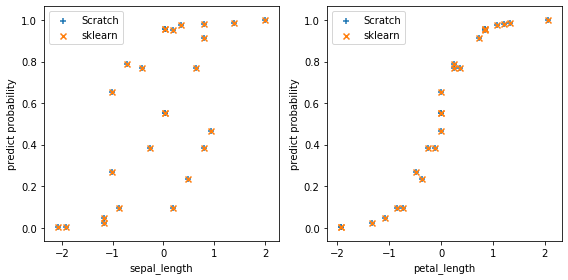

In [20]:
# 特徴量に対する予測値の分布
import matplotlib.pyplot as plt
%matplotlib inline
features = ['sepal_length', 'petal_length']
fig = plt.figure(figsize=(len(features) * 4, 4))
for j in range(len(features)):
    ax = fig.add_subplot(1, len(features), j+1)
    ax.scatter(X_test2_scl[:, j], y_slr_pred_proba, label='Scratch', marker='+')
    ax.scatter(X_test2_scl[:, j], y_pred_proba[:, 1], label='sklearn', marker='x')
    ax.set_xlabel(features[j])
    ax.set_ylabel('predict probability')
    ax.legend()
fig.tight_layout()

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

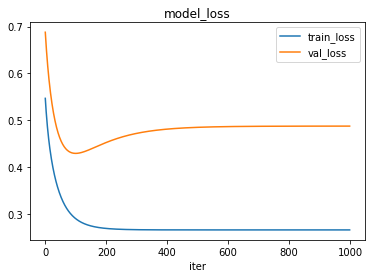

In [21]:
# 損失関数のプロット
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.show()

## 【問題7】決定領域の可視化
決定領域を可視化してください。

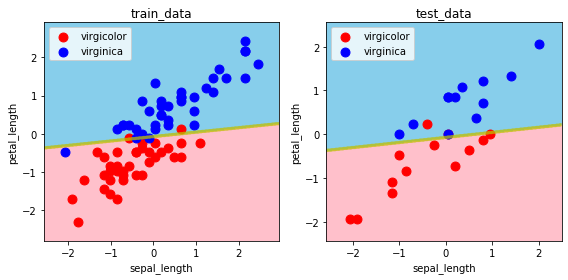

In [22]:
# 決定領域の図
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# setting
n_class=2
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
target_names = ['virgicolor', 'virginica']
title_names = ['train_data', 'test_data']
X_data = X_train2_scl, X_test2_scl
y_data = y_train2, y_test2
fig = plt.figure(figsize=(4*n_class, 4))
for j in range(n_class):
    X, y = X_data[j], y_data[j]
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, 0.01),
                                     np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, 0.01))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    mesh_pred = slr.predict(mesh).reshape(mesh_f0.shape)

    # plot
    ax = fig.add_subplot(1, 2, j+1)
    ax.set_xlabel('sepal_length')
    ax.set_ylabel('petal_length')
    ax.set_title(title_names[j])
    ax.contourf(mesh_f0, mesh_f1, mesh_pred, n_class-1, cmap=ListedColormap(contourf_color))
    ax.contour(mesh_f0, mesh_f1, mesh_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        ax.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    ax.legend(handles=patches)
    ax.legend()
fig.tight_layout()
plt.show()

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

[pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント](https://docs.python.org/ja/3/library/pickle.html)

[numpy.savez — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html)

In [23]:
import pickle
with open('Sprint4_object_file', 'wb') as f:
    pickle.dump(slr, f)

In [24]:
with open('Sprint4_object_file', 'rb') as f:
    save_object = pickle.load(f)
save_object.coef_, save_object.intercept_

(array([-0.38619089,  3.33724085]), 0.2315540229602887)